In [48]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os

Chargement du fichier .npy

In [49]:
data = np.load('data.npy')

On évalue les dimensions du dataset

In [50]:
print(data.shape)
print(data[0])

(1200, 4)
[662.26157739  54.39554155 -20.58877384 -37.70065046]


On définit une fonction qui nous permettra de faire des plot en 3 dimensions

In [51]:
def plot_3d(data, kmeans, labels):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='viridis')
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2])
    ax.set_title('K-Means Elbow 3D')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    fig.colorbar(scatter, ax=ax, label='couleur label')
    plt.show()

Nous choissions 2 méthodes de clustering et 2 méthode d'heuristique.

### Choix méthode de Clustering :
 - K-means -> Nous choisissons K-means en raison de son efficacité et de sa simplicité, le rendant adapté aux ensembles de données avec des clusters de taille égale.
 - Agglomerative Hierarchical Clustering -> Nous optons pour le Clustering Hiérarchique Agglomératif afin de capturer les relations hiérarchiques au sein des données.
### Choix d'Heuristics  :
 - Elbow method -> Nous choisissons la méthode du Coude pour déterminer le nombre optimal de clusters (K) dans K-means.
 - Silhouette method -> Nous choisissons la méthode Silhouette pour évaluer la qualité du clustering en mesurant la cohésion et la séparation.

**K-means avec méthode Elbow**

In [52]:
inertias = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(data)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

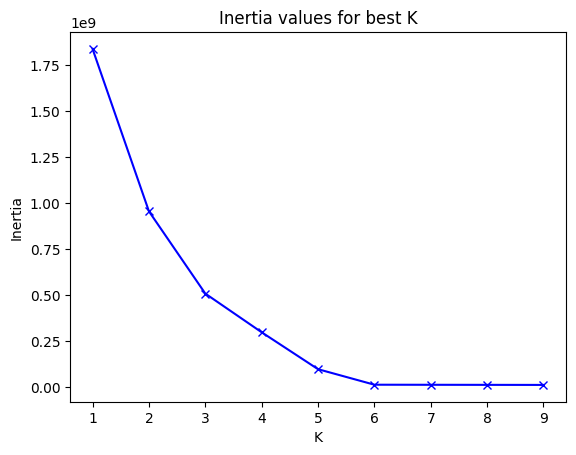

In [53]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Inertia values for best K')
plt.show()

Le point 'elbow' se trouve la ou K à pour valeur 6, c'est donc là que se trouve la valeur optimale de K pour le clustering.

**K-means with Silhouette method**

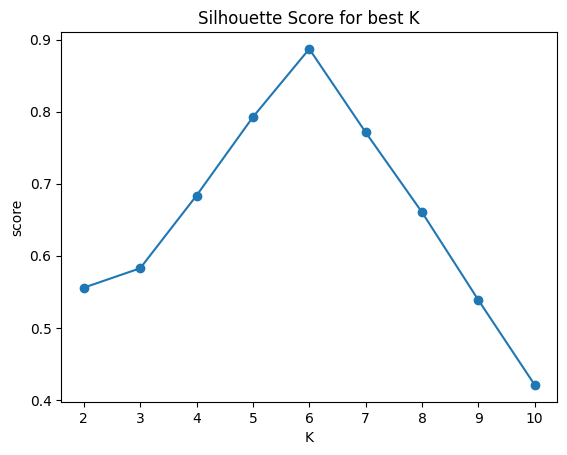

In [54]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for best K')
plt.xlabel('K')
plt.ylabel('score')
plt.show()

Un k optimal de 6 revient dans les 2 heuristics choisi pour k-means, on peut effectuer un plot en 3 dimensions

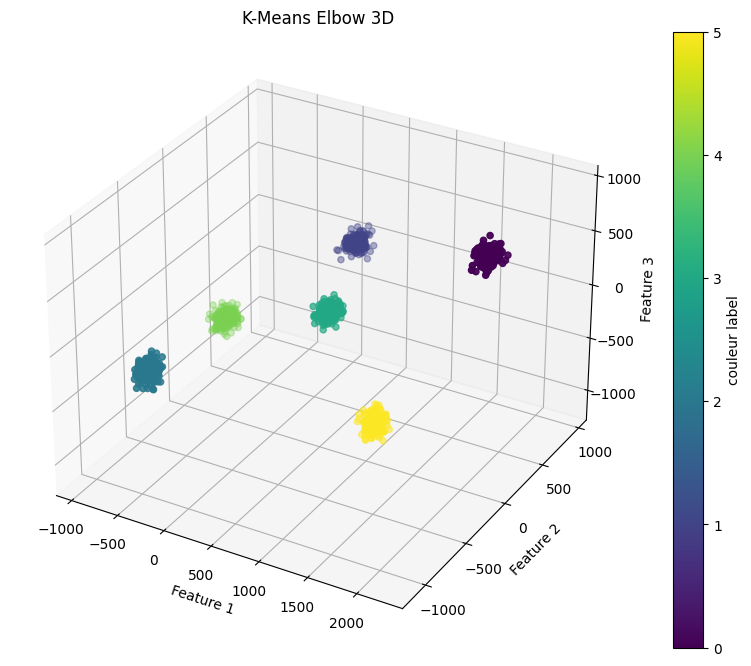

In [55]:
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(data)
plot_3d(data, kmeans, labels)

import de la partie agglomerative clustering :

In [56]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances_argmin_min

autre fonction de plot 3d adapté a l'agglomerative clustering

In [57]:
def plot_3d_agglomerative(data, n_clusters):
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clustering.fit_predict(data)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    for cluster in range(max(cluster_labels) + 1):
        cluster_points = data[cluster_labels == cluster]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {cluster + 1}')
    ax.set_title('Agglomerative Clustering in 3D')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.legend()
    plt.show()

D'après K-means avec le score Silhouette comme heuristic, la valeur optimal de K pour le clustering est 6 comme l'indique le sommet du graphe.

***Agglomerative Hierarchical Clustering avec méthode Elbow (avec manhattan comme métrique)***

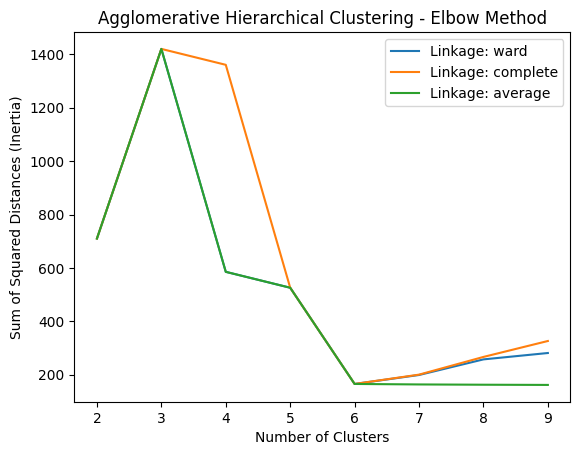

In [58]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances_argmin_min

cluster_range = range(2, 10)
linkage_methods = ['ward', 'complete', 'average']

for linkage in linkage_methods:
    inertia_values = []
    for n_clusters in cluster_range:
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        model.fit(data)
        labels = model.labels_
        cluster_centers = np.array([data[labels == i].mean(axis=0) for i in range(n_clusters)])
        # manhattan distance
        inertia = sum(pairwise_distances_argmin_min(cluster_centers, data, metric='manhattan')[1])
        inertia_values.append(inertia)
    plt.plot(cluster_range, inertia_values, label=f'Linkage: {linkage}')

plt.title('Agglomerative Hierarchical Clustering - Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.legend()
plt.show()


Pour le Agglomerative Hierachical Clustering avec méthode elbow, la valeur optimal du nombre de cluster est 6 d'après le elbow point du graphe.  

***Agglomerative Hierarchical Clustering avec méthode Silhouette (avec manhattan comme métrique)***

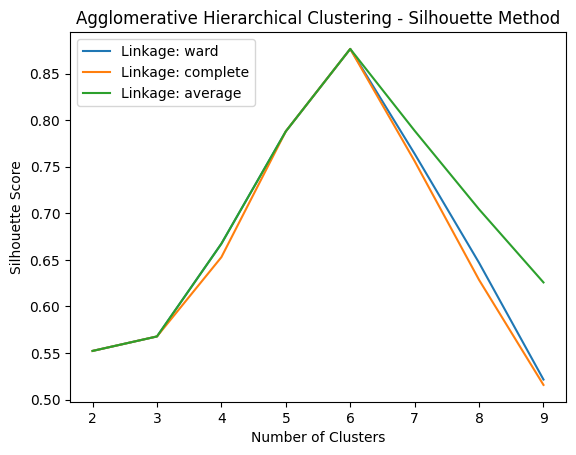

In [59]:
from sklearn.metrics import silhouette_score

csluster_range = range(2, 10)
linkage_methods = ['ward', 'complete', 'average']

for linkage in linkage_methods:
    silhouette_scores = []
    for n_clusters in cluster_range:
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = model.fit_predict(data)
        silhouette_avg = silhouette_score(data, labels, metric='manhattan')
        silhouette_scores.append(silhouette_avg)
    plt.plot(cluster_range, silhouette_scores, label=f'Linkage: {linkage}')

plt.title('Agglomerative Hierarchical Clustering - Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()


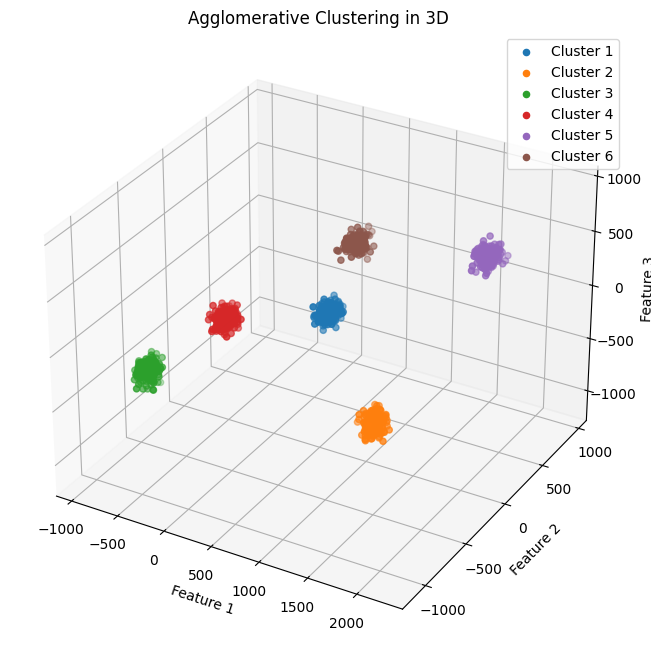

In [60]:
plot_3d_agglomerative(data, 6)

Pour la méthode silhouette, le pic arrive lorque le nombre de cluster est 6.

### Résulats

Dans chaque combinaisons de méthodes de clustering nous avons trouvé que la valeur optimal du nombre de cluster est 6, cela indique une robustesse entre les méthodes et nous permet de conclure que la valeur optenu est perminente, de plus les clusters sont presques identiques entre les 2 méthode k-means et agglomerative clustering.